In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
!pip install langdetect

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ovi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ovi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ovi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Ovi\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import string
from langdetect import detect
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
path = '/Ml files/cyberbully detection/'
df=pd.read_csv(path + "dataset/cyber_bully.csv")
df.head()

,Text,aggressive_label,attack_label,toxicity_label,sexism_recism_label
0,`- This is not ``creative``. Those are the di...,0.0,0.0,0.0,0.0
1,Ummm. The article uses imperial measuremen...,0.0,0.0,0.0,0.0
2,::I disagree. I would leave it out of the in...,0.0,0.0,0.0,0.0
3,:::I don't know where you got the idea that ...,0.0,0.0,0.0,0.0
4,MarcusAurelius]] Why exactly was this user b...,0.0,0.0,0.0,0.0


In [4]:
df.loc[(df.aggressive_label==1)|
               (df.attack_label==1)|
               (df.toxicity_label==1)|
               (df.sexism_recism_label==1)
               , 'acceptable'] = 0  

df.loc[(df.aggressive_label== 0)&
               (df.attack_label== 0)&
               (df.toxicity_label== 0)&
               (df.sexism_recism_label== 0)
               , 'acceptable'] = 1 
df.head() 

,Text,aggressive_label,attack_label,toxicity_label,sexism_recism_label,acceptable
0,`- This is not ``creative``. Those are the di...,0.0,0.0,0.0,0.0,1.0
1,Ummm. The article uses imperial measuremen...,0.0,0.0,0.0,0.0,1.0
2,::I disagree. I would leave it out of the in...,0.0,0.0,0.0,0.0,1.0
3,:::I don't know where you got the idea that ...,0.0,0.0,0.0,0.0,1.0
4,MarcusAurelius]] Why exactly was this user b...,0.0,0.0,0.0,0.0,1.0


In [5]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)

Dataset size: (95608, 6)
Columns are: Index(['Text', 'aggressive_label', 'attack_label', 'toxicity_label',
       'sexism_recism_label', 'acceptable'],
      dtype='object')


In [6]:
bully_df=df.loc[(df.aggressive_label==1)|
                   (df.attack_label==1)|
                   (df.toxicity_label==1)|
                   (df.sexism_recism_label==1)|
                (df.acceptable==0)] 

not_bully_df=df.loc[(df.aggressive_label==0)&
                   (df.attack_label==0)&
                   (df.toxicity_label==0)&
                   (df.sexism_recism_label==0)&
                    (df.acceptable==1)
                   ] 

In [7]:
print('Dataset size of bully texts:',bully_df.shape)
print('Dataset size of not bully texts:',not_bully_df.shape)

Dataset size of bully texts: (22305, 6)
Dataset size of not bully texts: (73303, 6)


In [8]:
#Function for checking word length
def cal_len(data):
    return len(data)


#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()   

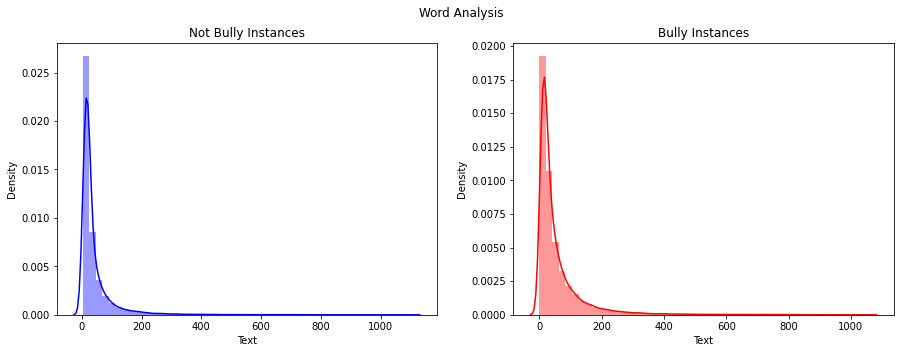

In [9]:
count_not_bully_words=not_bully_df['Text'].str.split().apply(lambda z:cal_len(z))
count_bully_words=bully_df['Text'].str.split().apply(lambda z:cal_len(z))

plot_count(count_not_bully_words,count_bully_words,"Not Bully Instances","Bully Instances","Word Analysis")

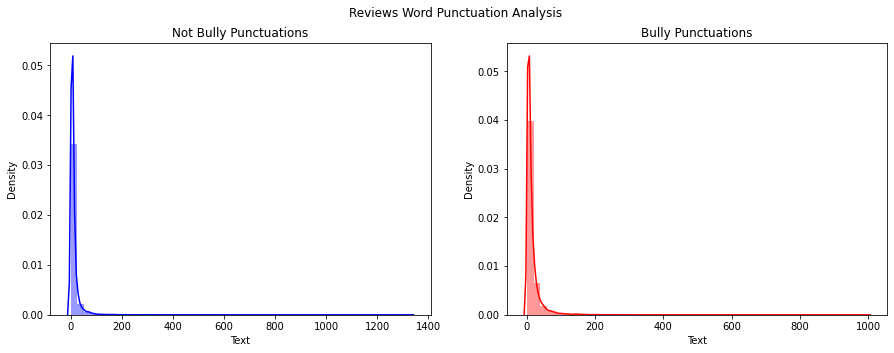

In [10]:
#We will be using the "generic_plotter" function.

count_not_bully_punctuations=not_bully_df['Text'].apply(lambda z: len([c for c in str(z) if c in string.punctuation]))
count_bully_punctuations=bully_df['Text'].apply(lambda z:len([c for c in str(z) if c in string.punctuation]))

plot_count(count_not_bully_punctuations,count_bully_punctuations,"Not Bully Punctuations","Bully Punctuations","Reviews Word Punctuation Analysis")

C:\Users\Ovi\anaconda3\envs\tensrgpu\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


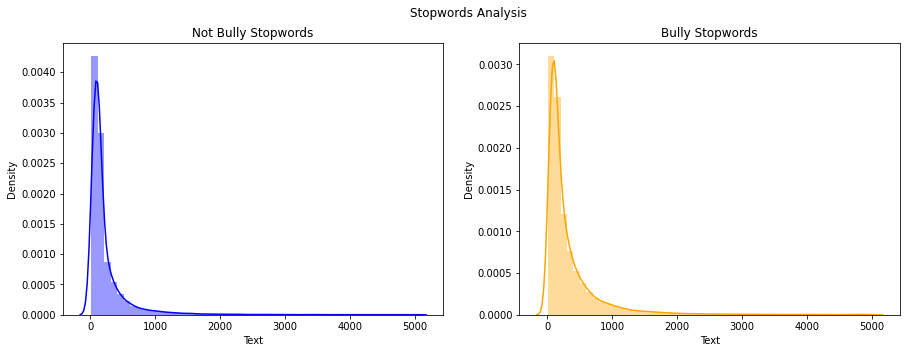

In [11]:
#Analyse Stopwords

def plot_count_1(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Orange')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    


stops=set(stopwords.words('english'))
count_not_bully_stops=not_bully_df['Text'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
count_bully_stops=bully_df['Text'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))

plot_count_1(count_not_bully_stops,count_bully_stops,"Not Bully Stopwords","Bully Stopwords","Stopwords Analysis")

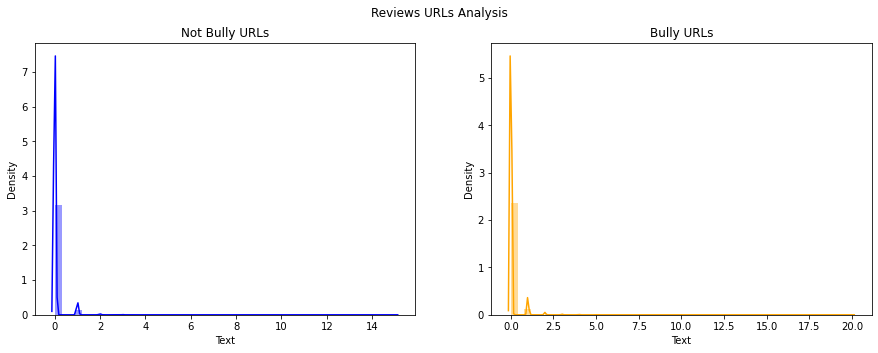

In [12]:
## Checking number of Urls
count_not_bully_urls=not_bully_df['Text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
count_bully_urls=bully_df['Text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

plot_count_1(count_not_bully_urls,count_bully_urls,"Not Bully URLs","Bully URLs","Reviews URLs Analysis")

In [13]:
from PIL import Image
def display_cloud(data):
    plt.subplots(figsize=(10,10))
    wc = WordCloud(stopwords=STOPWORDS, 
                   background_color="white", contour_width=2,
                   max_words=2000, max_font_size=256,
                   random_state=42)
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

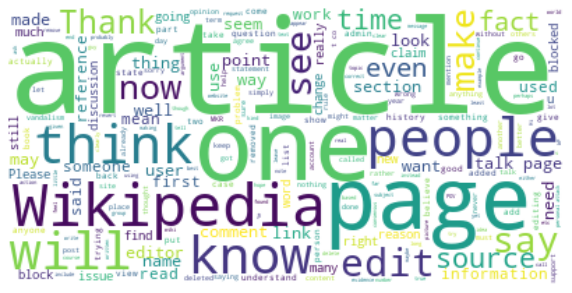

In [14]:
#Wordlcouds for Not bully texts
display_cloud( not_bully_df['Text'])

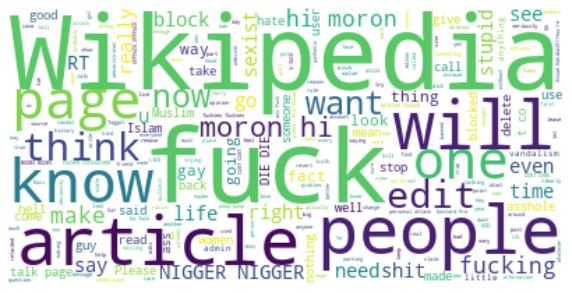

In [15]:
#Wordlcouds for bully texts
display_cloud(bully_df['Text'])

Before we move ahead , let us clean the dataset and remove the redundancies.This includes

1. HTML codes
2. URLs
3. Emojis
4. Stopwords
5. Punctuations
6. Expanding Abbreviations

These will be sufficient for cleaning the corpus!

Regex is a very good tool which will help us to do this cleaning.

In [16]:
def remove_mentions(data):
    # define the pattern to match mentions
    pattern = r'@[A-Za-z0-9]+'
    # replace all mentions with an empty string
    data = re.sub(pattern, '', data)
    return data

In [17]:
def to_lower_case(data):
    # convert all letters to lowercase
    data = data.lower()
    return data

In [18]:
import re
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

In [19]:
#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data


In [20]:
#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

In [21]:
#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data


In [22]:
#  removes all the numbers 
def remove_numbers(data):
    # define the pattern to match digits
    pattern = r'\d+'
    # replace all digits with an empty string
    data = re.sub(pattern, '', data)
    return data

In [23]:
## In this case, we will be replacing some abbreviated pronouns with full forms (example:"you've"->you have")
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data) 
    return data

In [ ]:
def remove_stopwords(text):
    # split the text into individual words
    words = text.split()
    stop_words = set(stopwords.words('english'))
    # remove the stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # rejoin the filtered words into a string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

In [ ]:
#Lemmatize the dataset
from nltk.stem import WordNetLemmatizer
def lemma_traincorpus(data):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in data:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

In [24]:
df['Text'] = df['Text'].astype(str)
df['Text']=df['Text'].apply(lambda z: remove_mentions(z))
df['Text']=df['Text'].apply(lambda z: to_lower_case(z))
df['Text']=df['Text'].apply(lambda z: remove_abb(z))
df['Text']=df['Text'].apply(lambda z: remove_numbers(z))
df['Text']=df['Text'].apply(lambda z: remove_punctuations(z))
df['Text']=df['Text'].apply(lambda z: remove_html(z))
df['Text']=df['Text'].apply(lambda z: remove_url(z))
df['Text']=df['Text'].apply(lambda z: remove_emoji(z))
df['Text']=df['Text'].apply(lambda z: remove_stopwords(z))
df['Text']=df['Text'].apply(lambda z: lemma_traincorpus(z))

In [32]:
df

,Text,aggressive_label,attack_label,toxicity_label,sexism_recism_label,acceptable
0,creative dictionary definitions terms insuranc...,0.0,0.0,0.0,0.0,1.0
1,ummm article uses imperial measurements si one...,0.0,0.0,0.0,0.0,1.0
2,disagree would leave introductory part since p...,0.0,0.0,0.0,0.0,1.0
3,know got idea mt airys counties two one tokerb...,0.0,0.0,0.0,0.0,1.0
4,marcusaurelius exactly user banned,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
95603,feeling sorry girls safe kat andre going home mkr,0.0,0.0,0.0,0.0,1.0
95604,mkr pretty good dishes happy ok well never eat...,0.0,0.0,0.0,0.0,1.0
95605,rt deconstructed lemon tartcan please go one s...,0.0,0.0,0.0,0.0,1.0
95606,stupid talk blocked,0.0,0.0,0.0,0.0,1.0


In [33]:
df.to_csv(path + "dataset/experimental_dataset.csv", index=False)